<a href="https://colab.research.google.com/github/EisFragment/Tarea_8/blob/main/Tarea8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1. Numpy

### 1. Convierte los siguientes datos sobre varias especies de cetáceos en un arreglo de NumPy y ordénalo por
    1.  Masa
    2.  Población.
    
Determina en cada caso el índice en el que debería insertarse la ballena de Bryde (población: 100000, masa: 25 toneladas) para mantener el arreglo ordenado.

In [ ]:
import numpy as np

# Ruta del archivo de datos
file_path = 'sample_data/whale-data.txt'

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    header = f.readline()  # Leemos la cabecera y la ignoramos
    for num_line, line in enumerate(f, start=2):
        parts = line.strip().split()
        # Verificamos que la línea tenga al menos tres elementos
        if len(parts) < 3:
            print(f"Skipping line {num_line} (insuficientes columnas): {line.strip()}")
            continue
        try:
            # Asumimos que los dos últimos tokens son la población y la masa
            pop = float(parts[-2])
            mass = float(parts[-1])
            # El nombre de la especie es la unión de todos los tokens anteriores
            species = " ".join(parts[:-2])
            data.append((species, mass, pop))
        except Exception as e:
            print(f"Error procesando la línea {num_line}: {line.strip()} | {e}")

# Definimos un arreglo estructurado usando un dtype adecuado
dtype = [('species', 'U50'), ('mass', 'f8'), ('pop', 'f8')]
whales = np.array(data, dtype=dtype)

print("Datos de cetáceos leídos:")
for rec in whales:
    print(rec)

# Datos de la ballena de Bryde a insertar: masa 25 toneladas y población 100000
bryde = np.array([('Bryde', 25.0, 100000.0)], dtype=dtype)

# Ordenamos el arreglo por la columna 'mass'
sorted_mass = np.sort(whales, order='mass')
idx_mass = np.searchsorted(sorted_mass['mass'], bryde['mass'][0])
print("\nArreglo ordenado por masa:")
for rec in sorted_mass:
    print(rec)
print("Índice de inserción para 'Bryde' (por masa):", idx_mass)

# Ordenamos el arreglo por la columna 'pop'
sorted_pop = np.sort(whales, order='pop')
idx_pop = np.searchsorted(sorted_pop['pop'], bryde['pop'][0])
print("\nArreglo ordenado por población:")
for rec in sorted_pop:
    print(rec)
print("Índice de inserción para 'Bryde' (por población):", idx_pop)


Datos de cetáceos leídos:
('Bowhead whale', 60.0, 9000.0)
('Blue whale', 120.0, 20000.0)
('Fin whale', 70.0, 100000.0)
('Humpback whale', 30.0, 80000.0)
('Gray whale', 35.0, 26000.0)
('Atlantic white-sided dolphin', 0.235, 250000.0)
('Pacific white-sided dolphin', 0.15, 1000000.0)
('Killer whale', 4.5, 100000.0)
('Narwhal', 1.5, 25000.0)
('Beluga', 1.5, 100000.0)
('Sperm whale', 50.0, 2000000.0)
('Baiji', 0.13, 13.0)
('North Atlantic right whale', 75.0, 300.0)
('North Pacific right whale', 80.0, 200.0)
('Southern right whale', 70.0, 7000.0)

Arreglo ordenado por masa:
('Baiji', 0.13, 13.0)
('Pacific white-sided dolphin', 0.15, 1000000.0)
('Atlantic white-sided dolphin', 0.235, 250000.0)
('Beluga', 1.5, 100000.0)
('Narwhal', 1.5, 25000.0)
('Killer whale', 4.5, 100000.0)
('Humpback whale', 30.0, 80000.0)
('Gray whale', 35.0, 26000.0)
('Sperm whale', 50.0, 2000000.0)
('Bowhead whale', 60.0, 9000.0)
('Fin whale', 70.0, 100000.0)
('Southern right whale', 70.0, 7000.0)
('North Atlantic right

### 2. El algoritmo del cordón para calcular el área de un polígono simple (es decir, uno sin agujeros ni intersecciones consigo mismo) procede de la siguiente manera:

- Escribe las coordenadas (x, y) de los N vértices en un arreglo N × 2 y luego repite las coordenadas del primer vértice como la última fila para hacer un arreglo (N + 1) × 2. Ahora
- Multiplica cada valor de la coordenada x en las primeras N filas por el valor de la coordenada y en la siguiente fila hacia abajo y toma la suma, $S_1 = x_1 y_2 + x_2 y_3 + · · · + x_N y_1$.
- Multiplica cada valor de la coordenada y en las primeras N filas por el valor de la coordenada x en la siguiente fila hacia abajo y toma la suma, $S_2 = y_1 x_2 + y_2 x_3 + · · · + y_N x_1$.

El área del polígono es entonces 1/2 |S1 − S2|.

Implementa este algoritmo como una función que tome un arreglo de NumPy de vértices como argumento y devuelva el área del polígono sin usar bucles en Python.


In [ ]:
import numpy as np

def polygon_area(vertices):
    """
    Calcula el área de un polígono simple (sin intersecciones) usando el algoritmo del cordón.

    Parámetros:
      vertices: arreglo NumPy de forma (N, 2) conteniendo las coordenadas (x, y) de los vértices

    Retorna:
      Área del polígono (valor positivo).
    """
    # Crear un arreglo (N+1, 2) repitiendo el primer vértice al final
    vertices_closed = np.vstack([vertices, vertices[0]])

    # Suma de x[i] * y[i+1]
    S1 = np.sum(vertices_closed[:-1, 0] * vertices_closed[1:, 1])

    # Suma de y[i] * x[i+1]
    S2 = np.sum(vertices_closed[:-1, 1] * vertices_closed[1:, 0])

    # El área es 1/2 de la diferencia absoluta entre S1 y S2
    return 0.5 * np.abs(S1 - S2)

# Ejemplo de uso:
# Definimos un rectángulo de 4x3
vertices = np.array([[0, 0],
                     [4, 0],
                     [4, 3],
                     [0, 3]])
print("Área del polígono:", polygon_area(vertices))


Área del polígono: 12.0


### 3. La función Gaussiana normalizada con media $\mu$ y desviación estándar $\sigma$ es:

$
g(x) = \frac{1}{\sigma\sqrt(2 \pi)} exp (-\frac{(x-\mu)^2}{2\sigma^2})
$

- Escribe un programa para calcular y graficar las funciones Gaussianas con $\mu = 0$ y $\sigma = 0.5, 1, 1.5$.
    * Usa una cuadrícula de 1,000 puntos en el intervalo −10 ≤ x ≤ 10.  
    * Verifica que las funciones están normalizadas con un área de 1.  
    * Calcula la primera derivada de estas funciones en la misma cuadrícula utilizando la aproximación de
    diferencia central de primer orden: g'(x) para algún valor pequeño de h elegido adecuadamente.


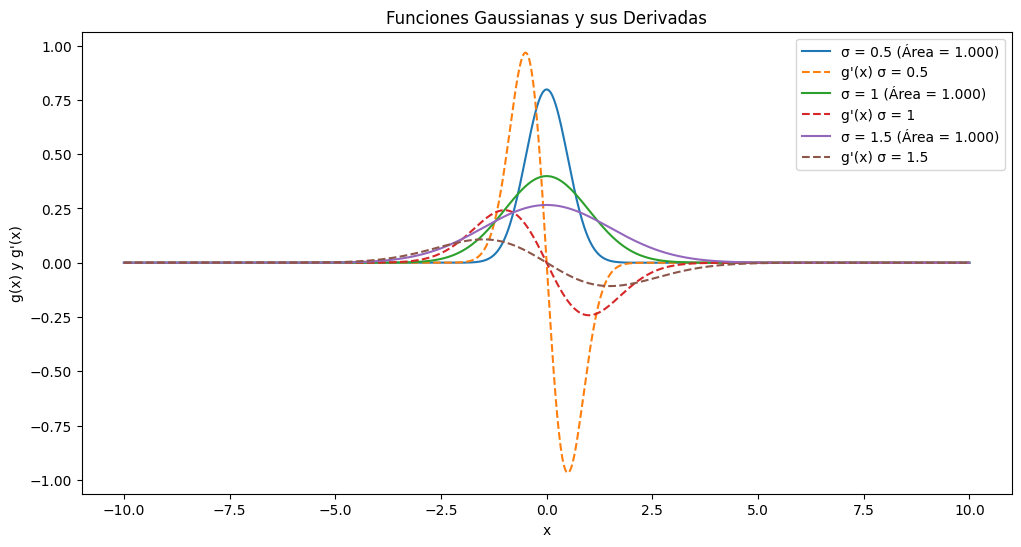

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    """Función gaussiana normalizada."""
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-((x-mu)**2)/(2*sigma**2))

def central_diff(y, h):
    """
    Aproxima la primera derivada usando diferencia central.
    Se utiliza np.roll para desplazar el arreglo.
    """
    return (np.roll(y, -1) - np.roll(y, 1)) / (2 * h)

# Cuadrícula de 1000 puntos en el intervalo [-10, 10]
x = np.linspace(-10, 10, 1000)
h = x[1] - x[0]  # Tamaño del paso

mu = 0
sigma_values = [0.5, 1, 1.5]

plt.figure(figsize=(12, 6))
for sigma in sigma_values:
    g = gaussian(x, mu, sigma)
    # Verificación de normalización usando np.trapezoid
    area = np.trapezoid(g, x)
    # Aproximación de la derivada usando diferencia central
    dg = central_diff(g, h)

    plt.plot(x, g, label=f'σ = {sigma} (Área = {area:.3f})')
    plt.plot(x, dg, '--', label=f"g'(x) σ = {sigma}")

plt.title("Funciones Gaussianas y sus Derivadas")
plt.xlabel("x")
plt.ylabel("g(x) y g'(x)")
plt.legend()
plt.show()

### 4. El archivo de texto `mountain.txt` proporciona algunos datos sobre los picos de 8,000 m, en orden alfabético.

Usa el método `loadtxt` de NumPy para leer estos datos en un arreglo estructurado adecuado y determinar lo siguiente:

1. El pico de 8,000 m más bajo.
2. Los picos más al norte, al este, al sur y al oeste.
3. El ascenso más reciente de los picos.
4. El primero de los picos en ser escalado en invierno.

Crea otro arreglo estructurado que contenga una lista de montañas con su altura en pies y la fecha del primer ascenso, ordenado por altura creciente.


In [ ]:
import numpy as np

# Función para convertir coordenadas de grados/minutos/segundos a grados decimales
def dms_to_decimal(coord):
    d, m, s, hemi = int(coord[:-1].split('d')[0]), int(coord.split('d')[1].split('m')[0]), int(coord.split('m')[1].split('s')[0]), coord[-1]
    decimal = d + m / 60 + s / 3600
    if hemi in ['S', 'W']:  # Sur y Oeste son negativos
        decimal *= -1
    return decimal

# Leer el archivo
filename = "sample_data/"
mountains = []

with open(filename, 'r') as file:
    lines = file.readlines()[6:]  # Omitimos las primeras 6 líneas de encabezado

for line in lines:
    parts = line.split()
    if len(parts) < 8:
        continue  # Saltamos líneas vacías o mal formateadas

    name = " ".join(parts[:-7])  # Nombre de la montaña
    height = int(parts[-7])  # Altura en metros
    first_ascent = parts[-6]  # Fecha del primer ascenso
    first_winter = parts[-5] if parts[-5] != '-' else None  # Fecha del ascenso invernal
    lat = dms_to_decimal(parts[-4] + parts[-3] + parts[-2])  # Latitud en decimal
    lon = dms_to_decimal(parts[-1] + parts[-2] + parts[-1])  # Longitud en decimal

    mountains.append((name, height, first_ascent, first_winter, lat, lon))

# Convertir a un array estructurado de NumPy
dtype = [('name', 'U30'), ('height', 'i4'), ('first_ascent', 'U10'), ('first_winter', 'U10'), ('lat', 'f8'), ('lon', 'f8')]
mountains_array = np.array(mountains, dtype=dtype)

# 1. Pico de 8000 m más bajo
lowest_peak = np.min(mountains_array, order='height')

# 2. Picos más extremos
northernmost = mountains_array[np.argmax(mountains_array['lat'])]
southernmost = mountains_array[np.argmin(mountains_array['lat'])]
easternmost = mountains_array[np.argmax(mountains_array['lon'])]
westernmost = mountains_array[np.argmin(mountains_array['lon'])]

# 3. Ascenso más reciente
latest_ascent = mountains_array[np.argmax(mountains_array['first_ascent'])]

# 4. Primer ascenso en invierno
winter_ascents = mountains_array[mountains_array['first_winter'] != None]
first_winter_ascent = winter_ascents[np.argmin(winter_ascents['first_winter'])]

# Resultados
lowest_peak, northernmost, southernmost, easternmost, westernmost, latest_ascent, first_winter_ascent


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ex6-2-b-mountain-data.txt'

### 5. El archivo airports.txt proporciona detalles de los 30 aeropuertos más transitados del mundo en 2014.
Los campos delimitados por tabulaciones son: código IATA de tres letras, nombre del aeropuerto, ubicación del aeropuerto,latitud y longitud (ambas en grados).

Escribe un programa para determinar la distancia entre los aereopuertos John F. Kennedy International Airport (JFK) y Los Angeles International Airport (LAX), utilizando la fórmula de Haversine  y asumiendo una Tierra esférica con un radio de 6378.1 km.




### 6. Los conjuntos de datos sobre las tasas de inmunización infantil para tuberculosis, polio y sarampión en tres países del sudeste asiático entre 1960 y 2013 están disponibles en wb-data.dat.

Los campos están delimitados por punto y coma y los valores faltantes se indican con '..'.

Utiliza métodos de NumPy para leer estos datos y crear tres gráficos (uno para cada vacuna) comparando las tasas de inmunización en los tres países.


# 8.2 Matplotlib

### 7. Escribe un programa para graficar la función de Planck, $B(\lambda)$, para la radiancia espectral de un cuerpo negro a temperatura $T$ como función de la longitud de onda, /lambda, para el Sol (T = 5778 K):

$
B(λ) = \frac{2hc^2}{\lambda^5}\frac{1}{exp(hc/\lambda k_B T)-1}
$

Usa un arreglo de NumPy para almacenar valores de $B(\lambda)$ desde 100 hasta 5,000 nm, pero configura el rango de longitud de onda para que disminuya de 4,000 nm a 0.

### 8. El llamado "juego del caos" es un algoritmo para generar un fractal.

* Primero definelos n vértices de un polígono regular y un punto inicial, $x_0$, $y_0$, seleccionado al azar dentro del polígono. Luego genera una secuencia de puntos, comenzando con $x_0$, $y_0$, donde cada punto es una fracción $r$ de la distancia entre el anterior y un vértice del polígono elegido al azar.

Por ejemplo, el algoritmo aplicado con los parámetros n = 3, r = 0.5 genera un triángulo de Sierpinski.

https://es.wikipedia.org/wiki/Tri%C3%A1ngulo_de_Sierpinski

Escribe un programa para dibujar fractales utilizando el algoritmo del juego del caos.


### 9. Escribe el código para leer el archivo dat.txtque contiene las alturas y masas de 260 mujeres y 247 hombres.

Grafica los pares (altura, masa) de cada individuo en un diagrama de dispersión y, para cada sexo, dibuja una elipse de covarianza 3$\sigma$ alrededor del punto medio.

Las dimensiones de esta elipse están dadas por los valores propios (escalados) de la matriz de covarianza y está rotada de manera que su semieje mayor se alinee con el vector propio más grande.

Incluir contornos del índice de masa corporal, definido por

$
IMC = (masa/kg)/(altura/m)^2.
$  

Traza estos contornos para delimitar las supuestas categorías de "bajo peso" (< 18.5), "sobrepeso" (> 25) y "obesidad" (> 30).

Coloca manualmente las etiquetas de los contornos de manera que no interfieran con los puntos dispersos graficados y formatea las etiquetas con un decimal.


### 10. Las altitudes medias de los cuadrados hectáreos de 10 km × 10 km utilizados por el Ordnance Survey del Reino Unido para mapear Gran Bretaña se encuentran en el archivo de matriz NumPy `gb-alt.npy`, los valores NaN en esta matriz denotan el mar.

Traza un mapa de la isla utilizando estos datos con `ax.imshow` y genera mapas adicionales asumiendo un aumento del nivel medio del mar de (a) 10 m, (b) 50 m, (c) 200 m. En cada caso, deduce el porcentaje del área terrestre restante en relación con su valor actual.


# 8.3 Scipy


### 11. Utiliza las constantes y factores de conversión de SciPy para calcular la densidad numérica, N/V, de moléculas de gas ideal a temperatura y presión estándar (T = 0 °C, p = 1 atm). La ley de los gases ideales es pV = NkB T.


### 12. Escribe una función, `get_wv`, que tome una energía de disociación de enlace molar, `D0`, en kJ $mol^{-1}$ y devuelva la longitud de onda de un fotón correspondiente a esa energía por molécula, en nm. La energía de un fotón con longitud de onda $\lambda$ es E = hc/$\lambda$.


### 13. Utiliza `scipy.integrate.quad`para evaluar las siguentes integrales definidas

$
a) \int_0^1 \frac{x^4(1-x)^4}{1+x^2} dx
$

Compara con el valor exacto: 22/7-$\pi$  

$
b) \int_0^\infty \frac{x^3}{e^x-1} dx
$

Compara con el valor exacto de la tería de Deby: $\pi^4$/15  

$
c) \int_0^1 x^{-x} dx
$

Compara con el valor: $\sum_{n=1}^{\infty} n^{-n}$

$
d) \int_0^1 [ln(\frac{1}{x})]^p dx
$

Compara con p! para enteros en $0 \leq p \leq 10$

$
c) \int_0^{2\pi} e^{zcos\theta} d\theta
$

Compara con: $I_0(z) /2 \pi$ donde $I_0$ es la función de Bessel modificada de primer orden

### 14. Encuentra las raices de

$
f(x) =\frac{1}{5}+ x cos(\frac{3}{x})
$


utilizando

1. `scipy.optimize.brentq`
2. `scipy.optimize.newton`

### 15. La ley de desplazamiento de Wien predice que la longitud de onda de máxima emisión de un cuerpo negro descrito por la ley de Planck es proporcional a $1/T$:

$
\lambda_{max} T = b
$

donde $b$ es una constante conocida como la constante de desplazamiento de Wien.

Dada la distribución de Planck de la densidad de energía emitida como función de la longitud de onda,

$
u(\lambda , T) =\frac{8\pi^2 h c}{\lambda^5}\frac{1}{exp^{\lambda k_B T}-1}
$           
determina la constante $b$ utilizando `scipy.optimize.minimize_scalar` para encontrar el máximo en $u(\lambda, T)$ para temperaturas en el rango 500 K $\leq$ T $leq$ 6000 K y ajustando $lamba_{max}$ a una línea recta contra 1/T.

Compara con el valor "exacto" de b, que está disponible dentro de `scipy.constants`.
